<a href="https://colab.research.google.com/github/travelmail26/muselseep/blob/main/Muse_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#sra section

In [ ]:
!pip install mne
import pandas as pd
import mne

#dataFile = pd.read_csv("/content/stimulant_mindMonitor_2023-01-18--14-37-14.csv", skiprows=0, usecols=[*range(1,21)])
#url = 'https://www.dropbox.com/s/ttv6vxh3ys7q0ou/mindMonitor_2023-01-18--14-37-14.csv?dl=1'
dataFile = pd.read_csv('/content/mindMonitor_2023-01-18--14-37-14.csv', skiprows=0, usecols=[*range(1,21)])

chanName = ['Delta_TP9','Delta_AF7','Delta_AF8','Delta_TP10','Theta_TP9','Theta_AF7','Theta_AF8','Theta_TP10','Alpha_TP9','Alpha_AF7','Alpha_AF8','Alpha_TP10','Beta_TP9','Beta_AF7','Beta_AF8','Beta_TP10','Gamma_TP9','Gamma_AF7','Gamma_AF8','Gamma_TP10']
fs = 1
info = mne.create_info(ch_names=chanName, sfreq=fs)
dataFile = dataFile.transpose()
rawData = mne.io.RawArray(dataFile,info)
t = len(rawData.times)
mne.set_config('MNE_BROWSE_RAW_SIZE','30,10')

mne.viz.plot_raw(rawData, n_channels=4, duration=t, order=[0,1,2,3], color='darkblue', show_scrollbars=False, show_scalebars=False)
mne.viz.plot_raw(rawData, n_channels=4, duration=t, order=[4,5,6,7], color='darkgreen', show_scrollbars=False, show_scalebars=False)
mne.viz.plot_raw(rawData, n_channels=4, duration=t, order=[8,9,10,11], color='black', show_scrollbars=False, show_scalebars=False)
mne.viz.plot_raw(rawData, n_channels=4, duration=t, order=[12,13,14,15], color='red', show_scrollbars=False, show_scalebars=False)
mne.viz.plot_raw(rawData, n_channels=4, duration=t, order=[16,17,18,19], color='purple', show_scrollbars=False, show_scalebars=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


FileNotFoundError: ignored

In [ ]:
import pandas as pd
from tkinter import filedialog as fd

# Second of the start of every session
baseline = 0
intervention = 115 #01:55
pause = 230 #03:50
eyesClosed = 255 #04:15
viewResol = 348 #05:48
eyesOpen = 425 #07:05
finish = 501 #08:21

# Var
varTemp = [baseline,intervention,pause,eyesClosed,viewResol,eyesOpen,finish]
varName = ['baseline','intervention','pause','eyesClosed','viewResol','eyesOpen','finish']

var = pd.DataFrame(varTemp, columns=['Session'])

#dataFile = pd.read_csv("/content/baseline_mindMonitor_2023-01-18--13-17-22.csv")
dataFile = pd.read_csv("/content/mindMonitor_2023-01-18--14-37-14.csv", skiprows=0, usecols=[*range(1,21)])
readData = pd.DataFrame(dataFile, columns=['Delta_TP9','Delta_AF7','Delta_AF8','Delta_TP10','Theta_TP9','Theta_AF7','Theta_AF8','Theta_TP10','Alpha_TP9','Alpha_AF7','Alpha_AF8','Alpha_TP10','Beta_TP9','Beta_AF7','Beta_AF8','Beta_TP10','Gamma_TP9','Gamma_AF7','Gamma_AF8','Gamma_TP10'])
readTime = pd.read_csv("/content/mindMonitor_2023-01-18--14-37-14.csv", skiprows=0, usecols=[0])

dataMin = readData.min().min()
dataMax = readData.max().max()
normData = readData.copy()

for col in normData.columns:
    normData[col] = normData[col]-dataMin / dataMax-dataMin

sumData = normData.sum(axis=0)

# Time Stamp
timeStamp = readTime.copy()
time0 = readTime.loc[0].to_string(header=False,index=False)
time0 = pd.Timestamp(time0)

for row in range(1,len(readTime),1):
    time1 = readTime.loc[row].to_string(header=False,index=False)
    time1 = pd.Timestamp(time1)
    timeStamp.loc[row] = pd.Timedelta(time1-time0).total_seconds()

timeStamp.loc[0] = 0

# Data analysis
# --- getting the index of each session
timeIndex = var.copy()
for row in range(0,len(var)):
    varTime = var.loc[row]['Session']
    timeTemp = timeStamp.iloc[(timeStamp['TimeStamp']-varTime).abs().argsort()[:1]]
    timeIndex.loc[row]['Session'] = timeTemp.index[0]

# --- splitting the data based on the timeline index
power = pd.DataFrame([], columns=['Delta_TP9','Delta_AF7','Delta_AF8','Delta_TP10','Theta_TP9','Theta_AF7','Theta_AF8','Theta_TP10','Alpha_TP9','Alpha_AF7','Alpha_AF8','Alpha_TP10','Beta_TP9','Beta_AF7','Beta_AF8','Beta_TP10','Gamma_TP9','Gamma_AF7','Gamma_AF8','Gamma_TP10'])
power = power.transpose()
for row in range(0,len(timeIndex)-1):
    row0 = timeIndex.loc[row]['Session']
    row1 = timeIndex.loc[row+1]['Session']
    powTemp = normData.iloc[row0:row1].mean()
    power.insert(row,varName[row],powTemp)

powerT = power.transpose()

# Graph
ax = powerT.plot(y=['Delta_TP9','Delta_AF7','Delta_AF8','Delta_TP10'], kind='line', style='.-', title='Delta Band Difference among Channels')
ax.set(ylabel='Averaged Power')
ax = powerT.plot(y=['Theta_TP9','Theta_AF7','Theta_AF8','Theta_TP10'], kind='line', style='.-', title='Theta Band Difference among Channels')
ax.set(ylabel='Averaged Power')
ax = powerT.plot(y=['Alpha_TP9','Alpha_AF7','Alpha_AF8','Alpha_TP10'], kind='line', style='.-', title='Alpha Band Difference among Channels')
ax.set(ylabel='Averaged Power')
ax = powerT.plot(y=['Beta_TP9','Beta_AF7','Beta_AF8','Beta_TP10'], kind='line', style='.-', title='Beta Band Difference among Channels')
ax.set(ylabel='Averaged Power')
ax = powerT.plot(y=['Gamma_TP9','Gamma_AF7','Gamma_AF8','Gamma_TP10'], kind='line', style='.-', title='Gamma Band Difference among Channels')
ax.set(ylabel='Averaged Power')

In [ ]:
dataFile.head()

In [ ]:
#@title
import pandas as pd
from tkinter import filedialog as fd

# Second of the start of every session (Stimulant intervention)

eyesClosed1 = 12 #00:12
thinking = 70 #01:10
eyesClosed2 = 77 #01:17
intervention = 134 #02:14
postTreatment = 237 #03:57 
finish = 370 #06:10

# Var
varTemp = [eyesClosed1,thinking,eyesClosed2,intervention,postTreatment,finish]
varName = ['eyesClosed1','thinking','eyesClosed2','intervention','postTreatment','finish']

print ('vartemp table of numbers', varTemp)

var = pd.DataFrame(varTemp, columns=['Session'])

#dataFile = pd.read_csv("/content/stimulant_mindMonitor_2023-01-18--14-37-14.csv")
dataFile = pd.read_csv("/content/mindMonitor_2023-01-18--14-37-14.csv", skiprows=0, usecols=[*range(1,21)])
readData = pd.DataFrame(dataFile, columns=['Delta_TP9','Delta_AF7','Delta_AF8','Delta_TP10','Theta_TP9','Theta_AF7','Theta_AF8','Theta_TP10','Alpha_TP9','Alpha_AF7','Alpha_AF8','Alpha_TP10','Beta_TP9','Beta_AF7','Beta_AF8','Beta_TP10','Gamma_TP9','Gamma_AF7','Gamma_AF8','Gamma_TP10'])
readTime = pd.read_csv("/content/mindMonitor_2023-01-18--14-37-14.csv", skiprows=0, usecols=[0])

dataMin = readData.min().min()
dataMax = readData.max().max()
normData = readData.copy()

#normalize data columns by min and max
for col in normData.columns:
    normData[col] = normData[col]-dataMin / dataMax-dataMin

sumData = normData.sum(axis=0)

# Time Stamp
timeStamp = readTime.copy()
time0 = readTime.loc[0].to_string(header=False,index=False)
time0 = pd.Timestamp(time0)

print ('readTime', readTime, 'end readtime table**')

print ('timestamp table', timeStamp)

for row in range(1,len(readTime),1):
    time1 = readTime.loc[row].to_string(header=False,index=False)
    time1 = pd.Timestamp(time1)
    timeStamp.loc[row] = pd.Timedelta(time1-time0).total_seconds()

timeStamp.loc[0] = 0

# Data analysis
# --- getting the index of each session
timeIndex = var.copy()
print('time index', var.copy())

for row in range(0,len(var)):
    varTime = var.loc[row]['Session']
    print ('var time in loop', varTime ) #loops over teach time event time period
    timeTemp = timeStamp.iloc[(timeStamp['TimeStamp']-varTime).abs().argsort()[:1]]
    print ('timetemp in loop', timeTemp, 'end timestamp**')
    timeIndex.loc[row]['Session'] = timeTemp.index[0]

# --- splitting the data based on the timeline index
power = pd.DataFrame([], columns=['Delta_TP9','Delta_AF7','Delta_AF8','Delta_TP10','Theta_TP9','Theta_AF7','Theta_AF8','Theta_TP10','Alpha_TP9','Alpha_AF7','Alpha_AF8','Alpha_TP10','Beta_TP9','Beta_AF7','Beta_AF8','Beta_TP10','Gamma_TP9','Gamma_AF7','Gamma_AF8','Gamma_TP10'])
power = power.transpose()
for row in range(0,len(timeIndex)-1):
    row0 = timeIndex.loc[row]['Session']
    row1 = timeIndex.loc[row+1]['Session']
    powTemp = normData.iloc[row0:row1].mean()
    power.insert(row,varName[row],powTemp)

powerT = power.transpose()

# Graph
ax = powerT.plot(y=['Delta_TP9','Delta_AF7','Delta_AF8','Delta_TP10'], kind='line', style='.-', title='Delta Band Difference among Channels')
ax.set(ylabel='Averaged Power')
ax = powerT.plot(y=['Theta_TP9','Theta_AF7','Theta_AF8','Theta_TP10'], kind='line', style='.-', title='Theta Band Difference among Channels')
ax.set(ylabel='Averaged Power')
ax = powerT.plot(y=['Alpha_TP9','Alpha_AF7','Alpha_AF8','Alpha_TP10'], kind='line', style='.-', title='Alpha Band Difference among Channels')
ax.set(ylabel='Averaged Power')
ax = powerT.plot(y=['Beta_TP9','Beta_AF7','Beta_AF8','Beta_TP10'], kind='line', style='.-', title='Beta Band Difference among Channels')
ax.set(ylabel='Averaged Power')
ax = powerT.plot(y=['Gamma_TP9','Gamma_AF7','Gamma_AF8','Gamma_TP10'], kind='line', style='.-', title='Gamma Band Difference among Channels')
ax.set(ylabel='Averaged Power')

#test edit in google colab

#greg section

equation for relative band power

rel_waves[wave] = math.pow(10,abs_waves[wave]) / (math.pow(10,abs_waves[0]) + math.pow(10,abs_waves[1]) + math.pow(10,abs_waves[2]) + math.pow(10,abs_waves[3]) + math.pow(10,abs_waves[4]))

alpha_relative = (10^alpha_absolute / (10^alpha_absolute + 10^beta_absolute + 10^delta_absolute + 10^gamma_absolute + 10^theta_absolute))

https://mind-monitor.com/forums/viewtopic.php?p=3676&hilit=relative#p3676

In [2]:
!pip install mne
!pip install yasa
import pandas as pd
import mne
import numpy as np
import yasa




[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


/home/codespace/.python/current/lib/python3.10/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [5]:
##load files

#dataFile = pd.read_csv("/content/stimulant_mindMonitor_2023-01-18--14-37-14.csv", skiprows=0, usecols=[*range(1,21)])
#url = 'https://www.dropbox.com/s/ttv6vxh3ys7q0ou/mindMonitor_2023-01-18--14-37-14.csv?dl=1'
url = 'https://www.dropbox.com/s/a5uwkqaq71mkrxp/mindMonitor_2023-02-17--18-29-44_choc_intervention.csv?dl=1'
urlmantrameditation = 'https://www.dropbox.com/s/z09umrre7qgg4ld/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv?dl=1'
urlmantra2 = 'https://www.dropbox.com/s/z0eoyhwinrep224/mindMonitor_2023-03-28--10-43-44_after_breakfast_baseline_mantra__3_intervention_breathfocus_4.csv?dl=1'
#dataFile = pd.read_csv('/content/mindMonitor_2023-01-18--14-37-14.csv', skiprows=0, usecols=[*range(1,21)])
urlsleep = 'https://www.dropbox.com/s/hu50afgorep21c6/mindMonitor_2023-04-03--01-28-07_sleep.csv?dl=1'
#dfraw = pd.read_csv('/content/mindMonitor_2023-01-18--14-37-14.csv')

#dfraw = pd.read_csv('/content/mindMonitor_2023-02-15--14-48-03_stiumant_limited_interventions.csv')
#dfraw = pd.read_csv('/content/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv')
#dfraw = pd.read_csv('/content/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv')
#urlsleep58 = 'https://www.dropbox.com/s/9r516639sms98sj/mindMonitor_2023-05-07--23-31-37_5188390995226691787_sleep.csv?dl=1'
dfraw = pd.read_csv(urlmantrameditation)


df = dfraw

/tmp/ipykernel_10972/2112912086.py:16: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  dfraw = pd.read_csv(urlmantrameditation)


In [6]:
df.columns

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'AUX_LEFT', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z',
       'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7',
       'HSI_AF8', 'HSI_TP10', 'Battery', 'Elements'],
      dtype='object')

In [ ]:
#pd.to_timedelta(df['TimeStamp']).head()
from datetime import datetime

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
time0 = df['TimeStamp'].loc[0]

df['elapsed'] = 'NA'

#df['Results'] = ['Pass' if m>=33 else 'Fail' for m in df['Marks']]
for row in range(1,len(df),1):
    time1 = df['TimeStamp'].loc[row]
    time1 = pd.Timestamp(time1)
    df['elapsed'].loc[row] = pd.Timedelta(time1-time0).total_seconds()

df['elapsed'] = pd.to_numeric(df['elapsed'], errors='coerce')
df.head()



In [ ]:
#for original dataset

import numpy as np
# conditions = [
#     (df['elapsed'] <= 2),
#     (df['elapsed'] > 2) & (df['elapsed'] <= 9),
#     (df['elapsed'] > 9) & (df['elapsed'] <= 15),
#     (df['elapsed'] > 15)
#     ]

# # create a list of the values we want to assign for each condition
# values = ['tier_4', 'tier_3', 'tier_2', 'tier_1']

# # create a new column and use np.select to assign values to it using our lists as arguments
# df['tier'] = np.select(conditions, values)

# display updated DataFrame
# df.head()

conditions = [
    (df['elapsed'] <= 12),
    (df['elapsed'] > 12) & (df['elapsed'] <= 70),
    (df['elapsed'] > 77) & (df['elapsed'] <= 134),
     (df['elapsed'] > 134) & (df['elapsed'] <= 237),
     (df['elapsed'] > 237) & (df['elapsed'] <= 370),
    (df['elapsed'] > 370)
    ]

# create a list of the values we want to assign for each condition
values = ['eyesClosed1', 'thinking', 'eyesClosed2', 'intervention', 'postTreatment', 'finish']

# create a new column and use np.select to assign values to it using our lists as arguments
df['mindful'] = np.select(conditions, values)



eyesClosed1 = 12 #00:12
thinking = 70 #01:10
eyesClosed2 = 77 #01:17
intervention = 134 #02:14
postTreatment = 237 #03:57 
finish = 370 #06:10

# display updated DataFrame
df.head(50)

In [ ]:
#for stimulant limted dataset

import numpy as np

conditions = [
    (df['elapsed'] <= 40),
    (df['elapsed'] > 40)
    ]

# create a list of the values we want to assign for each condition
values = ['before intervention', 'after intervention']

# create a new column and use np.select to assign values to it using our lists as arguments
df['mindful'] = np.select(conditions, values)

# display updated DataFrame
df.head(50)

In [ ]:
# dataMin = readData.min().min()
# dataMax = readData.max().max()
# normData = readData.copy()

# for col in normData.columns:
#     normData[col] = normData[col]-dataMin / dataMax-dataMin

df['Theta_AF7_norm'] = df['Theta_AF7']-df['Theta_AF7'].min() / (df['Theta_AF7'].max()-df['Theta_AF7'].min())
df['Beta_AF7_norm'] = df['Beta_AF7']-df['Beta_AF7'].min() / (df['Beta_AF7'].max()-df['Beta_AF7'].min())
df['ThetaBetaRatio_AF7_norm'] = df['Theta_AF7_norm'] / df['Beta_AF7_norm']



df.head()

In [ ]:
df.columns

               mindful  Gamma_AF7
0                    0        NaN
1   after intervention   0.279185
2  before intervention  -0.274182


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

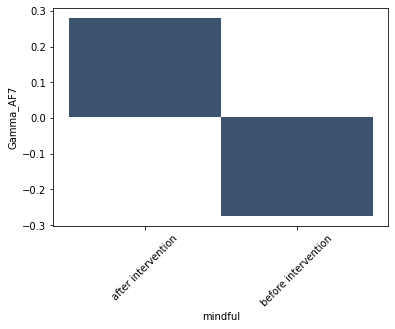

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#grouped =df.groupby(['mindful'])['ThetaBetaRatio_AF7_norm'].median()
grouped =df.groupby(['mindful'])['Gamma_AF7'].median()

#for original dataset
print(grouped.reset_index(inplace=False))

# sns.lineplot(x='mindful', y='ThetaBetaRatio_AF7_norm', data=grouped.reset_index())

#for stimulant limited dataset

sns.histplot(x='mindful', y='Gamma_AF7', data=grouped.reset_index())


plt.xticks(rotation=45)

In [ ]:
print(df.index)
from scipy.interpolate import interp1d

#df['interpolated'] = interp1d(df['elapsed'], df['ThetaBetaRatio_AF7_norm'], kind='cubic')


#ax = sns.lineplot(x='elapsed', y='ThetaBetaRatio_AF7_norm', data=df.sample(frac=1))
ax = sns.lineplot(x='TimeStamp', y='Gamma_AF7', data=dfs)

#ax2 = sns.lineplot(x='elapsed', y='Gamma_AF7', data=df.sample(frac=0.2))

ax.set(ylim=(-0.7, 6))

RangeIndex(start=0, stop=323441, step=1)


ValueError: ignored

In [ ]:
dfsec = df.rolling(256, min_periods=1).mean()
dfsec.head()
#dfs = dfsec.iloc[::30, :]

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,elapsed,Theta_AF7_norm,Beta_AF7_norm,ThetaBetaRatio_AF7_norm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.893279,-0.062322,0.380535,0.976929,0.724278,-0.427978,0.177997,0.726609,0.728232,-0.023578,...,1.0,1.0,1.0,1.0,1.0,35.0,0.097000,-0.133552,0.384288,-0.347532
2,0.893279,-0.067885,0.276120,0.955166,0.724278,-0.417322,0.105794,0.706989,0.728232,-0.023578,...,1.0,1.0,1.0,1.0,1.0,35.0,0.097000,-0.122896,0.379881,-0.323230
3,0.893279,-0.069740,0.241315,0.947912,0.724278,-0.413770,0.081726,0.700449,0.728232,-0.023578,...,1.0,1.0,1.0,1.0,1.0,35.0,0.097667,-0.119344,0.378413,-0.315129
4,0.893279,-0.070667,0.223913,0.944285,0.724278,-0.411994,0.069693,0.697179,0.728232,-0.023578,...,1.0,1.0,1.0,1.0,1.0,35.0,0.098000,-0.117568,0.377678,-0.311079


In [ ]:
dfs.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,elapsed,Theta_AF7_norm,Beta_AF7_norm,ThetaBetaRatio_AF7_norm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.893279,-0.073559,0.168613,0.933103,0.724278,-0.406602,0.032831,0.686825,0.728232,-0.023578,...,1.0,1.0,1.0,1.0,1.0,35.0,0.102933,-0.112176,0.375531,-0.298656
60,0.893279,-0.077120,0.085347,0.919546,0.724278,-0.399847,-0.013087,0.671110,0.728232,-0.023578,...,1.0,1.0,1.0,1.0,1.0,35.0,0.109767,-0.105422,0.373266,-0.282288
90,0.893279,-0.076505,0.029959,0.916427,0.724278,-0.393846,-0.039477,0.659111,0.728232,-0.023578,...,1.0,1.0,1.0,1.0,1.0,35.0,0.115956,-0.099420,0.370633,-0.267904
120,0.893279,-0.070616,-0.006359,0.922977,0.724278,-0.386986,-0.053021,0.649806,0.728232,-0.021521,...,1.0,1.0,1.0,1.0,1.0,35.0,0.122392,-0.092560,0.366856,-0.251482


# exploratory analysis

In [ ]:
#load 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://www.dropbox.com/s/uq60t8qy33i21dt/mindMonitor_2023-02-14--09-43-07_huberman_cyclic_breath_work.csv?dl=1'
dfraw = pd.read_csv(url)

dfraw.head()

In [ ]:
# reduce file size

# df = (dfraw.select_dtypes('number')
#    .rolling(256, min_periods=1).mean()
#    .join(dfraw.select_dtypes(exclude='number'))
#    [dfraw.columns]
#  )

# df = df[::512]

# print ('length of df', len(df))

# df.head(20)

#reduce 0.5 second intervals to 10 second rolling average

df = (dfraw.select_dtypes('number')
   .rolling(150, min_periods=1).mean()
   .join(dfraw.select_dtypes(exclude='number'))
   [dfraw.columns]
 )

df.head(20)

In [ ]:
#norming data and ratio


df['Theta_AF8_norm'] = (df['Theta_AF8']-df['Theta_AF8'].min()) / ((df['Theta_AF8'].max()-df['Theta_AF8'].min()))
df['Theta_AF8_norm'] = (df['Theta_AF8']-df['Theta_AF8'].min()) / ((df['Theta_AF8'].max()-df['Theta_AF8'].min()))

df['Beta_AF8_norm'] = (df['Beta_AF8']-df['Beta_AF8'].min()) / ((df['Beta_AF8'].max()-df['Beta_AF8'].min()))
df['Beta_AF7_norm'] = (df['Beta_AF7']-df['Beta_AF7'].min()) / ((df['Beta_AF7'].max()-df['Beta_AF7'].min()))


df['Beta_AF8_af7_combined_norm'] = df['Beta_AF8_norm'] + df['Beta_AF7_norm']



df['ThetaBetaRatio_AF8_norm'] = df['Theta_AF8_norm'] / df['Beta_AF8_norm']

df['Delta_AF7_norm'] = (df['Delta_AF7']-df['Delta_AF7'].min()) / ((df['Delta_AF7'].max()-df['Delta_AF7'].min()))


df.head(20)

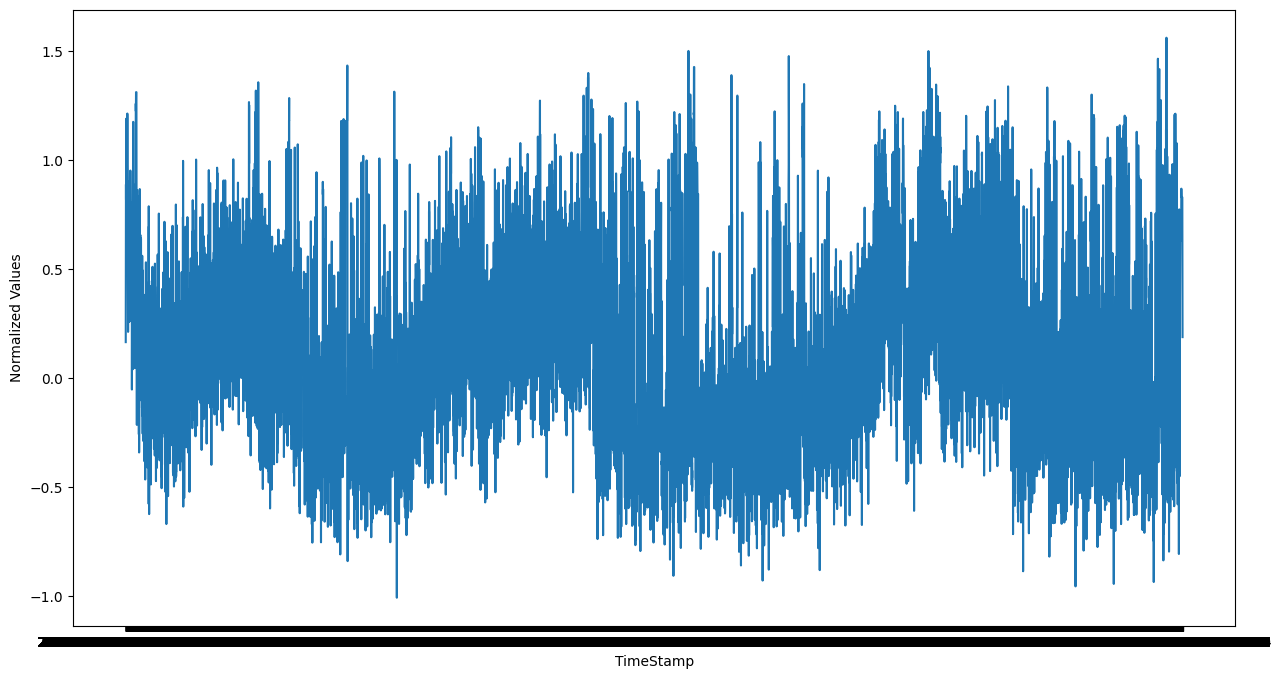

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np


fig, ax = plt.subplots(figsize=(15, 8))

#ax = sns.lineplot(x='TimeStamp', y='Beta_AF8_af7_combined_norm', data=df, ax=ax )

ax = sns.lineplot(x='TimeStamp', y='Delta_AF7', data=df, ax=ax )

ax.set_xlabel('TimeStamp')
ax.set_ylabel('Normalized Values')
plt.show()

ax.set(ylim=(-0.5, 3))
ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

##entropy

In [ ]:
!pip install antropy
import antropy as ant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 KB 5.3 MB/s eta 0:00:00
  Created wheel for antropy: filename=antropy-0.1.5-py3-none-any.whl size=16892 sha256=a160d30cb89190921db28e68bd7af87ac06b47ca336e628c68d05a72b4a4f80e
  Stored in directory: /root/.cache/pip/wheels/12/27/70/53866b1558c89df79d67411b20b094bcf304dec8f5c7a13ba9
Successfully built antropy


In [ ]:
len(df)

#https://www.analyticsvidhya.com/blog/2020/11/entropy-a-key-concept-for-all-data-science-beginners/

4203

In [ ]:
dfs = df.iloc[3500:]
x = dfs['Beta_AF8_norm'][df['Beta_AF8_norm'].notna()]
# Permutation entropy
print(ant.perm_entropy(x, normalize=True))
# Spectral entropy
print(ant.spectral_entropy(x, sf=100, method='welch', normalize=True))
# Singular value decomposition entropy
#print(ant.svd_entropy(x, normalize=True))
# Approximate entropy
#print(ant.app_entropy(x))
# Sample entropy
#print('sample entroy', ant.sample_entropy(x))
# Hjorth mobility and complexity
print(ant.hjorth_params(x))
# Number of zero-crossings
print(ant.num_zerocross(x))
# Lempel-Ziv complexity
print(ant.lziv_complexity('01111000011001', normalize=True))

0.7490919542861671
0.23509107964684098
(0.0352107439823444, 16.60612984353387)
0
1.3597696150205727


#sleep analysis

In [ ]:
!pip install yasa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.3 MB/s eta 0:00:00
  Created wheel for yasa: filename=yasa-0.6.3-py3-none-any.whl size=33

In [ ]:
import yasa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load EEG data
f = np.load('/content/data_full_6hrs_100Hz_Cz+Fz+Pz.npz')
data, ch_names = f['data'], f['chan']
sf = 100.

# Load hypnogram
hypno_30s = np.loadtxt('data_full_6hrs_100Hz_hypno_30s.txt')
hypno = yasa.hypno_upsample_to_data(hypno=hypno_30s, sf_hypno=(1/30), data=data, sf_data=sf)
print(hypno.shape, 'Unique values =', np.unique(hypno))

In [ ]:
#contruct yasa and mne array

# sampling_freq = 200  # in Hertz
# n_channels = 32
# info = mne.create_info(n_channels, sfreq=sampling_freq)
# print(info)

# data = np.array([sine, cosine])

# info = mne.create_info(ch_names=['10 Hz sine', '5 Hz cosine'],
#                        ch_types=['misc'] * 2,
#                        sfreq=sampling_freq)


n_channels = 1
sampling_freq = 2  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)


data = np.array(df['RAW_AF8'].to_list())

data = np.atleast_2d(data)

info = mne.create_info(ch_names=['rawf8'],
                        ch_types=['eeg'],
                        sfreq=sampling_freq)

simulated_raw = mne.io.RawArray(data, info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0
 chs: 1 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 2.0 Hz
>
Creating RawArray with float64 data, n_channels=1, n_times=35721
    Range : 0 ... 35720 =      0.000 ... 17860.000 secs
Ready.


In [ ]:
print(simulated_raw._data[0,0:200])

[          nan           nan           nan           nan  802.63736264
           nan  834.46886447           nan           nan  792.16117216
           nan  815.12820513           nan  852.1978022            nan
  819.56043956           nan           nan  810.6959707            nan
           nan  796.19047619           nan  799.01098901  805.86080586
           nan           nan  848.97435897           nan  790.95238095
           nan  823.18681319           nan           nan           nan
 1083.47985348           nan           nan  880.80586081           nan
           nan  764.76190476  810.29304029           nan           nan
           nan  801.02564103           nan           nan  791.75824176
           nan  808.27838828           nan           nan  764.35897436
           nan  755.09157509           nan           nan  823.58974359
           nan  816.73992674           nan  799.81684982           nan
  877.58241758           nan           nan  797.3992674            nan
  776.

In [ ]:
df.columns
#'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10'



Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'AUX_LEFT', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z',
       'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7',
       'HSI_AF8', 'HSI_TP10', 'Battery', 'Elements'],
      dtype='object')

## filtering raw data


In [8]:
#status
!pip install mne
import numpy as np
import pandas as pd
import seaborn as sns
import mne

# Get the time stamp column
time_stamps = np.array(df['TimeStamp'])

# Get the RAW_AF8 column
raw_af8 = df['RAW_AF8'].values

# Convert the data to a floating-point type
raw_af8 = raw_af8.astype(np.float64)

# Ensure the conversion has been successful
assert raw_af8.dtype == np.float64, f"Unexpected data type: {raw_af8.dtype}"

print(raw_af8.dtype)

# Create a high-pass filter at 0.1 Hz
sfreq = 256.0  # explicitly defined as float

# Apply the filter to the data
filtered_data = mne.filter.filter_data(raw_af8, sfreq, l_freq=0.1, h_freq=None, fir_design='firwin')

# Create a new column in the DataFrame
df['f8f'] = filtered_data



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip
float64
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


count    48640.000000
mean        -0.002775
std          6.190602
min        -34.884388
25%         -4.199510
50%         -0.054415
75%          4.161144
max         41.257385
Name: f8f, dtype: float64


<Axes: xlabel='TimeStamp', ylabel='f8f'>

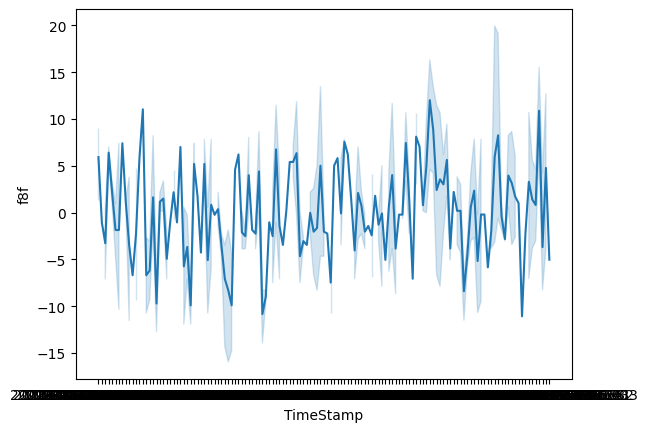

In [16]:
print(df['f8f'].describe())

df_no_nan_f8f = df[df["f8f"].notna()]


sns.lineplot(x='TimeStamp', y="f8f", data=df_no_nan_f8f.iloc[:300])



##large sleep section imported from git

for now, load sleep files manually. not working from url

In [ ]:
!pip install mne
!pip install yasa
import pandas as pd
import mne
import numpy as np
import yasa

#urlsleep58 = 'https://www.dropbox.com/s/9r516639sms98sj/mindMonitor_2023-05-07--23-31-37_5188390995226691787_sleep.csv?dl=1'
#urlnap58 = 'https://www.dropbox.com/s/fbjsqhjlhuocps4/mindMonitor_2023-05-08--14-47-48_7822430682462145648_nap.csv?dl=1'
#dfraw = pd.read_csv(urlnap58, skiprows=[169541, 202609])
#dfs = dfraw[['RAW_AF8']]

In [ ]:
# import urllib.request
# from tqdm import tqdm

# urlnap58 = 'https://www.dropbox.com/s/fbjsqhjlhuocps4/mindMonitor_2023-05-08--14-47-48_7822430682462145648_nap.csv?dl=1'
# # Download the file with a progress bar

# with urllib.request.urlopen(urlnap58) as response:
#     sleepfile = response.read().decode("utf-8")

# # Save the file to Colab memory
# with open("sleepfile.csv", "w") as f:
#     f.write(sleepfile)

In [ ]:
#manually loaded
df = pd.read_csv('/content/mindMonitor_2023-05-08--14-47-48_7822430682462145648_nap (2).csv', error_bad_lines=True)

<ipython-input-2-22b9173ced2b>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/mindMonitor_2023-05-08--14-47-48_7822430682462145648_nap (2).csv', error_bad_lines=True)
<ipython-input-2-22b9173ced2b>:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/mindMonitor_2023-05-08--14-47-48_7822430682462145648_nap (2).csv', error_bad_lines=True)


In [ ]:
df.shape

(120130, 42)

In [ ]:
df.columns

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'AUX_LEFT', 'Mellow', 'Concentration', 'Accelerometer_X',
       'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z',
       'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'Battery',
       'Elements'],
      dtype='object')

In [ ]:
df.head(300)

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2023-05-08 14:47:48.254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/event/connected MuseS-4987
1,2023-05-08 14:47:48.276,1.581541,0.723653,0.580109,1.334703,1.586183,0.727410,0.198375,1.011402,1.325018,...,6.310425,-4.157104,2.938385,1.0,2.0,1.0,1.0,2.0,100.0,NaN
2,2023-05-08 14:47:48.278,1.581541,0.723653,0.580109,1.334703,1.586183,0.727410,0.198375,1.011402,1.325018,...,6.310425,-4.157104,2.938385,1.0,2.0,1.0,1.0,2.0,100.0,NaN
3,2023-05-08 14:47:48.278,1.581541,0.723653,0.580109,1.334703,1.586183,0.727410,0.198375,1.011402,1.325018,...,6.310425,-4.157104,2.938385,1.0,2.0,1.0,1.0,2.0,100.0,NaN
4,2023-05-08 14:47:48.279,1.581541,0.723653,0.580109,1.334703,1.586183,0.727410,0.198375,1.011402,1.325018,...,6.310425,-4.157104,2.938385,1.0,2.0,1.0,1.0,2.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2023-05-08 14:47:49.344,1.581541,0.653342,0.832826,1.334703,1.586183,0.194576,0.308105,1.011402,1.325018,...,6.287994,-2.676697,1.831818,1.0,2.0,1.0,1.0,2.0,100.0,NaN
296,2023-05-08 14:47:49.344,1.581541,0.653342,0.832826,1.334703,1.586183,0.194576,0.308105,1.011402,1.325018,...,6.287994,-2.676697,1.831818,1.0,2.0,1.0,1.0,2.0,100.0,NaN
297,2023-05-08 14:47:49.344,1.581541,0.653342,0.832826,1.334703,1.586183,0.194576,0.308105,1.011402,1.325018,...,6.287994,-2.676697,1.831818,1.0,2.0,1.0,1.0,2.0,100.0,NaN
298,2023-05-08 14:47:49.344,1.581541,0.653342,0.832826,1.334703,1.586183,0.194576,0.308105,1.011402,1.325018,...,6.287994,-2.676697,1.831818,1.0,2.0,1.0,1.0,2.0,100.0,NaN


In [ ]:
df["time"] = pd.to_datetime(df["TimeStamp"])


In [ ]:
df['RAW_AF8'].describe()

count    119924.000000
mean        800.710902
std          64.420559
min           0.000000
25%         795.787540
50%         800.622700
75%         805.860800
max        1626.630000
Name: RAW_AF8, dtype: float64

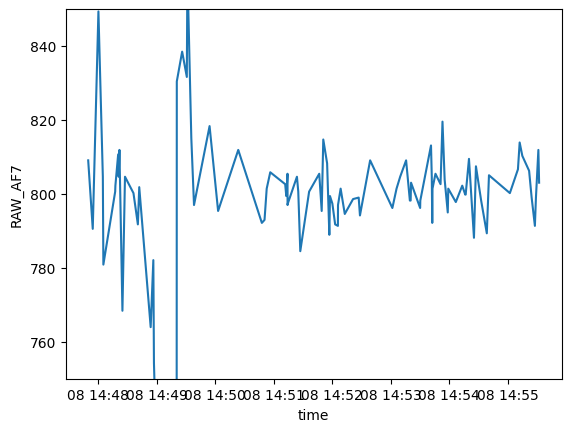

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Get the time periods
#start_time = 2023-05-08 14:47:48.254
#end_time = 2023-05-08 14:49:48.254

# Filter the dataframe to the specified time periods
#df = df[(df['timestamp'] > start_time) & (df['timestamp'] < end_time)]

# Create a line plot of the 'RAW_AF8' column, with the x-axis in seconds
#sns.lineplot(x=df['time'].dt.second, y='RAW_AF8', data=df)
fig, ax = plt.subplots()

sns.lineplot(x=df['time'], y='RAW_AF7', data=df.sample(100))
ax.set_ylim(750, 850)



# Show the plot
plt.show()


Creating RawArray with float64 data, n_channels=1, n_times=4229768
    Range : 0 ... 4229767 =      0.000 ... 16522.527 secs
Ready.


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#securit

<Axes: xlabel='Time (30-sec epoch)', ylabel='Probability'>

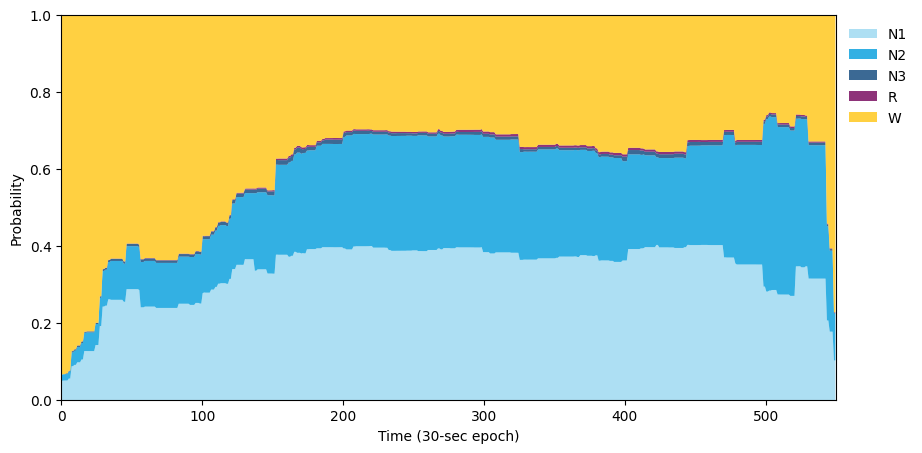

In [ ]:
dfs = dfraw[['RAW_AF8']]

def df_to_raw(df):
    raw = np.array(df)
    return raw

# changes: Set 'sfreq' to the minimum 81
# When it comes to electrophysiological data, MNE works on the basis of samples, not time points
# The duration of the recording can then be calculated by dividing the number of samples by the sampling frequency
# Using data from urlspeep: samples/frequency -> 35720/256 = 139.531 seconds
# OpenAI Prompt:
#   # The duration of recording of a mne object
def raw_to_mne(raw):
    info = mne.create_info(ch_names=['RAW_AF8'],
                           sfreq=256,
                           ch_types=['eeg'])
    mne_raw = mne.io.RawArray(raw, info)
    return mne_raw

# Turns the MNE object into the YASA package
def mne_to_yasa(mne_raw):
    yasa_raw = yasa.SleepStaging(mne_raw, eeg_name='RAW_AF8')
    return yasa_raw

# Initialize the sleep staging instance
sls = mne_to_yasa(raw_to_mne(df_to_raw(dfs.values.T)))

# Get the predicted sleep stages
hypno = sls.predict()
# Get the predicted probabilities
proba = sls.predict_proba()
# Get the confidence
confidence = proba.max(axis=1)
# Plot the predicted probabilities
sls.plot_predict_proba()

#Mock data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#url = 'https://www.dropbox.com/s/z09umrre7qgg4ld/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv?dl=1'
url = 'https://www.dropbox.com/s/a5uwkqaq71mkrxp/mindMonitor_2023-02-17--18-29-44_choc_intervention.csv?dl=1'
#url = 'https://www.dropbox.com/s/pdin2ayuuybcpi0/mindMonitor_2023-02-22--08-57-17_mantra_meditation.csv?dl=1'
#url = 'https://www.dropbox.com/s/uq60t8qy33i21dt/mindMonitor_2023-02-14--09-43-07_huberman_cyclic_breath_work.csv?dl=1'
dfraw = pd.read_csv(url)

dfraw.head()

#df = dfraw[::256]

In [ ]:
dictionary = {'TimeStamp': {0: '2023-02-23 08:01:50.701',
  1: '2023-02-23 08:01:50.798',
  2: '2023-02-23 08:01:50.798',
  3: '2023-02-23 08:01:50.800',
  4: '2023-02-23 08:01:50.800'},
 'Delta_TP9': {0: np.nan,
  1: 0.8932789112449511,
  2: 0.8932789112449511,
  3: 0.8932789112449511,
  4: 0.8932789112449511},
 'Delta_AF7': {0: np.nan,
  1: -0.062321571240896,
  2: -0.0734485722420289,
  3: -0.0734485722420289,
  4: -0.0734485722420289}}

dfm = pd.DataFrame.from_dict(dictionary)

NameError: ignored

In [ ]:
#contruct yasa and mne array

# sampling_freq = 200  # in Hertz
# n_channels = 32
# info = mne.create_info(n_channels, sfreq=sampling_freq)
# print(info)

# data = np.array([sine, cosine])

# info = mne.create_info(ch_names=['10 Hz sine', '5 Hz cosine'],
#                        ch_types=['misc'] * 2,
#                        sfreq=sampling_freq)


n_channels = 1
sampling_freq = 256  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)


data = np.array(df['Delta_TP9'].to_list())

data = np.atleast_2d(data)

info = mne.create_info(ch_names=['rawf8'],
                        ch_types=['eeg'],
                        sfreq=sampling_freq)

simulated_raw = mne.io.RawArray(data, info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0
 chs: 1 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 256.0 Hz
>
Creating RawArray with float64 data, n_channels=1, n_times=35721
    Range : 0 ... 35720 =      0.000 ...   139.531 secs
Ready.


In [ ]:
## reduce file size

df = (dfraw.select_dtypes('number')
   .rolling(500, min_periods=1).mean()
   .join(dfraw.select_dtypes(exclude='number'))
   [dfraw.columns]
 )

df = df[::256]

print (len(df))

182


In [ ]:

df = (dfraw.select_dtypes('number')
   .rolling(500, min_periods=1).mean()
   .join(dfraw.select_dtypes(exclude='number'))
   [dfraw.columns]
 )

df = df[::500]

print (len(df))

93


In [ ]:
#norming data and ratio

df['Theta_AF8_norm'] = (df['Theta_AF8']-df['Theta_AF8'].min()) / ((df['Theta_AF8'].max()-df['Theta_AF8'].min()))
df['Beta_AF8_norm'] = (df['Beta_AF8']-df['Beta_AF8'].min()) / ((df['Beta_AF8'].max()-df['Beta_AF8'].min()))
df['ThetaBetaRatio_AF8_norm'] = df['Theta_AF8_norm'] / df['Beta_AF8_norm']

df.head(20)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn.apionly as sns
import numpy as np


fig, ax = plt.subplots(figsize=(15, 8))

ax = sns.lineplot(x='TimeStamp', y='ThetaBetaRatio_AF8_norm', data=df, ax=ax )

#ax2 = sns.lineplot(x='TimeStamp', y='Gamma_AF8', data=dfraw, ax=ax)

ax.set(ylim=(-1, 3))
ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3000))


ModuleNotFoundError: ignored

In [ ]:
df = dfraw.ilocp

In [ ]:
x = dfraw.head(5)

x.iloc[:,0:3].to_dict()

In [ ]:
dictionary = {'TimeStamp': {0: '2023-02-23 08:01:50.701',
  1: '2023-02-23 08:01:50.798',
  2: '2023-02-23 08:01:50.798',
  3: '2023-02-23 08:01:50.800',
  4: '2023-02-23 08:01:50.800'},
 'Delta_TP9': {0: np.nan,
  1: 0.8932789112449511,
  2: 0.8932789112449511,
  3: 0.8932789112449511,
  4: 0.8932789112449511},
 'Delta_AF7': {0: np.nan,
  1: -0.062321571240896,
  2: -0.0734485722420289,
  3: -0.0734485722420289,
  4: -0.0734485722420289}}

dfm = pd.DataFrame.from_dict(dictionary)

#dfm.rolling(3).mean()

df.head()

In [ ]:
(df.select_dtypes('number')
   .rolling(3).mean()
   .join(df.select_dtypes(exclude='number'))
   [df.columns]
 )

In [ ]:
df.select_dtypes(exclude='number')[df.columns]

In [ ]:
dfsec = df.rolling(256, min_periods=1).mean()
dfsec.head()
#dfs = dfsec.iloc[::30, :]

df.index

In [ ]:
df_time = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                       index = [pd.Timestamp('20130101 09:00:00'),
                                pd.Timestamp('20130101 09:00:02'),
                                pd.Timestamp('20130101 09:00:03'),
                                pd.Timestamp('20130101 09:00:05'),
                                pd.Timestamp('20130101 09:00:06')])


df_time.rolling(2, min_periods=1).mean()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0.301, 0.477, 0.602, 0.699, 0.778, 0.845, 0.903, 0.954, 1.000, 1.044]

df = pd.DataFrame({"X" : x, "Log2" : y})

df.plot(x="X", y="Log2")
plt.title("Log2 graph")
plt.show()

### live streaming